In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, r2_score, mean_absolute_error

import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import sklearn
from sklearn.tree import export_graphviz
import graphviz
from collections import Counter

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from IPython.display import Image
from scipy.stats import norm
from scipy.signal import argrelextrema

In [3]:
prices = pd.read_csv("useful_data/round_2_day_1_joined_table.csv")
prices.rename(columns={prices.columns[0]: 'timestamp'}, inplace=True)
prices

,timestamp,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,...,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,total_ask_vol,total_bid_vol,ask_vwap,bid_vwap,spread
0,0,1094.0,10.0,1093.0,3.0,1086.0,41.0,1102.0,10.0,1104.0,...,10.5,-5.0,2100.0000,70.000000,1,54.0,54.0,1108.944444,1087.870370,8.0
1,100,1094.0,6.0,1093.0,2.0,1087.0,51.0,1102.0,6.0,1103.0,...,9.5,-5.0,2099.7570,70.022710,1,59.0,59.0,1108.949153,1087.915254,8.0
2,200,1093.0,6.0,1092.0,3.0,1085.0,49.0,1101.0,6.0,1102.0,...,9.5,-5.0,2099.5132,70.045395,1,58.0,58.0,1106.965517,1086.189655,8.0
3,300,1093.0,10.0,1092.0,4.0,1085.0,52.0,1101.0,10.0,1102.0,...,9.5,-5.0,2099.2683,70.068030,1,66.0,66.0,1107.363636,1086.636364,8.0
4,400,1093.0,10.0,1092.0,3.0,1086.0,51.0,1101.0,10.0,1102.0,...,9.5,-5.0,2099.0225,70.090640,1,64.0,64.0,1107.421875,1087.375000,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,99500,1067.0,5.0,1066.0,4.0,1060.0,43.0,1074.0,5.0,1075.0,...,8.5,-5.5,1701.2242,84.906700,1,52.0,52.0,1080.692308,1061.134615,7.0
996,99600,1068.0,7.0,1067.0,2.0,1061.0,46.0,1075.0,7.0,1076.0,...,8.5,-5.5,1700.9775,84.925300,1,55.0,55.0,1081.727273,1062.109091,7.0
997,99700,1068.0,5.0,1067.0,3.0,1061.0,48.0,1076.0,5.0,1077.0,...,8.5,-5.5,1700.7317,84.943930,1,56.0,56.0,1082.053571,1061.946429,8.0
998,99800,1068.0,8.0,1067.0,3.0,1061.0,49.0,1075.0,8.0,1076.0,...,8.5,-5.5,1700.4869,84.962590,1,60.0,60.0,1081.583333,1062.233333,7.0


In [4]:
prices_neg1 = pd.read_csv("../../data2024/round-2-island-data-bottle/prices_round_2_day_-1.csv", sep=";")

day = prices_neg1.columns[-1]
new_order = [day] + [col for col in prices_neg1.columns if col != day] 
prices_neg1 = prices_neg1[new_order]

prices_columns_to_convert = ['day', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_neg1[col] = pd.to_numeric(prices_neg1[col], errors='coerce')
    
prices_0 = pd.read_csv("../../data2024/round-2-island-data-bottle/prices_round_2_day_0.csv", sep=";")

day = prices_0.columns[-1]
new_order = [day] + [col for col in prices_0.columns if col != day] 
prices_0 = prices_0[new_order]

prices_columns_to_convert = ['day', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_0[col] = pd.to_numeric(prices_0[col], errors='coerce')

prices_pos1 = pd.read_csv("../../data2024/round-2-island-data-bottle/prices_round_2_day_1.csv", sep=";")

day = prices_pos1.columns[-1]
new_order = [day] + [col for col in prices_pos1.columns if col != day] 
prices_pos1 = prices_pos1[new_order]

prices_columns_to_convert = ['day', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_pos1[col] = pd.to_numeric(prices_pos1[col], errors='coerce')

orchids = pd.concat([prices_neg1, prices_0, prices_pos1], ignore_index=True)
orchids['new_timestamp'] = orchids['timestamp']
orchids.loc[10001:, 'new_timestamp'] += 1000100
orchids.loc[20002:, 'new_timestamp'] += 1000100
orchids

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp
0,-1,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,0
1,-1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,100
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,200
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,300
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,400
...,...,...,...,...,...,...,...,...,...
29998,1,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,2999800
29999,1,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,2999900
30000,1,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,3000000
30001,1,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,3000100


In [208]:
orchids['cum_sun'] = orchids.groupby('day')['SUNLIGHT'].cumsum()
orchids['remain_sun'] = (2500 * 7 / 12 * 10000 - np.minimum(orchids['cum_sun'], 2500 * 7 / 12 * 10000)) / 10000 * 12 / 7
orchids['sun_change'] = orchids['SUNLIGHT'].pct_change() * 100
orchids['sun_delta'] = orchids['SUNLIGHT'].pct_change() * 100 + 100
orchids['sun_gamma'] = (orchids['sun_delta']).pct_change(fill_method=None) * 100
orchids['hum_diff'] = (orchids['HUMIDITY'] - 70).abs()
orchids['hum_change'] = orchids['HUMIDITY'].pct_change() * 100
orchids['tte'] = (orchids['new_timestamp'].iloc[-1]  - orchids['new_timestamp']) / 100
orchids['orchid_diff'] = orchids['ORCHIDS'] - orchids.groupby('day')['ORCHIDS'].transform('first')
orchids['orchid_shift'] = orchids.groupby('day')['ORCHIDS'].shift(0)

features = ['TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY', 'cum_sun', 'remain_sun', 'hum_diff']
features_non_overlap = ['SUNLIGHT', 'HUMIDITY', 'cum_sun', 'hum_diff']
features_with_givens = ['sun_change', 'hum_diff', 'hum_change', 'remain_sun', 'SUNLIGHT']
orchids[orchids['day'] > 0]

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp,cum_sun,min_sun,sun_change,hum_diff,hum_change,tte,orchid_diff,sun_gamma,sun_delta,remain_sun,orchid_shift
20002,1,0,1098.25,0.9,10.5,-5.0,2100.0000,70.000000,2000200,2.100000e+03,2499.640000,23.529412,0.000000,7.692308,10000.0,0.00,23.594664,123.529412,2499.640000,1098.25
20003,1,100,1098.25,0.9,9.5,-5.0,2099.7570,70.022710,2000300,4.199757e+03,2499.280042,-0.011571,0.022710,0.032443,9999.0,0.00,-19.056986,99.988429,2499.280042,1098.25
20004,1,200,1096.75,0.9,9.5,-5.0,2099.5132,70.045395,2000400,6.299270e+03,2498.920125,-0.011611,0.045395,0.032397,9998.0,-1.50,-0.000039,99.988389,2498.920125,1096.75
20005,1,300,1097.00,0.9,9.5,-5.0,2099.2683,70.068030,2000500,8.398539e+03,2498.560251,-0.011665,0.068030,0.032315,9997.0,-1.25,-0.000054,99.988335,2498.560251,1097.00
20006,1,400,1097.25,0.9,9.5,-5.0,2099.0225,70.090640,2000600,1.049756e+04,2498.200418,-0.011709,0.090640,0.032269,9996.0,-1.00,-0.000044,99.988291,2498.200418,1097.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29998,1,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.935490,2999800,2.431260e+07,0.000000,0.000461,0.064510,0.022841,4.0,-62.00,0.000061,100.000461,0.000000,1036.25
29999,1,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.951530,2999900,2.431490e+07,0.000000,0.000522,0.048470,0.022935,3.0,-62.00,0.000061,100.000522,0.000000,1036.25
30000,1,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.967620,3000000,2.431720e+07,0.000000,0.000583,0.032380,0.023002,2.0,-62.00,0.000061,100.000583,0.000000,1036.25
30001,1,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.983780,3000100,2.431950e+07,0.000000,0.000652,0.016220,0.023096,1.0,-64.00,0.000070,100.000652,0.000000,1034.25


In [209]:
std_dev = orchids['sun_gamma'].std()
orchids['sun_gamma'].mean()

0.00021910741739145721

In [210]:
orchids_cleaned = orchids.dropna()
X = orchids_cleaned[features].copy()
X1 = orchids_cleaned[features_non_overlap].copy()
X2 = orchids_cleaned[features_with_givens].copy()
y = orchids_cleaned['ORCHIDS']

In [211]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

X_train_scaled = X_train # scaler.fit_transform(X_train) # 
X_test_scaled = X_test # scaler.transform(X_test) # 

# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train_scaled, y_train)

# Make predictions using the testing set
lin_pred = lin_reg.predict(X_test_scaled)

# Initialize the Random Forest Regressor
forest_reg = RandomForestRegressor(max_depth=4, min_samples_leaf=300, min_samples_split=1000, random_state=42)

# Train the model
forest_reg.fit(X_train_scaled, y_train)

# Make predictions using the testing set
forest_pred = forest_reg.predict(X_test_scaled)

In [212]:
# For Linear Regression
lin_r2 = r2_score(y_test, lin_pred)
lin_mse = mean_squared_error(y_test, lin_pred)
lin_mae = mean_absolute_error(y_test, lin_pred)

print(f"Linear Regression R2: {lin_r2}")
print(f"Linear Regression MSE: {lin_mse}")
print(f"Linear Regression MAE: {lin_mae}")

# For Random Forest Regressor
forest_r2 = r2_score(y_test, forest_pred)
forest_mse = mean_squared_error(y_test, forest_pred)
forest_mae = mean_absolute_error(y_test, forest_pred)

print(f"Random Forest R2: {forest_r2}")
print(f"Random Forest MSE: {forest_mse}")
print(f"Random Forest MAE: {forest_mae}")

Linear Regression R2: 0.4329524109962257
Linear Regression MSE: 3802.1896971863875
Linear Regression MAE: 41.61025849447791
Random Forest R2: 0.909052819069482
Random Forest MSE: 609.8225987164201
Random Forest MAE: 16.362475185512523


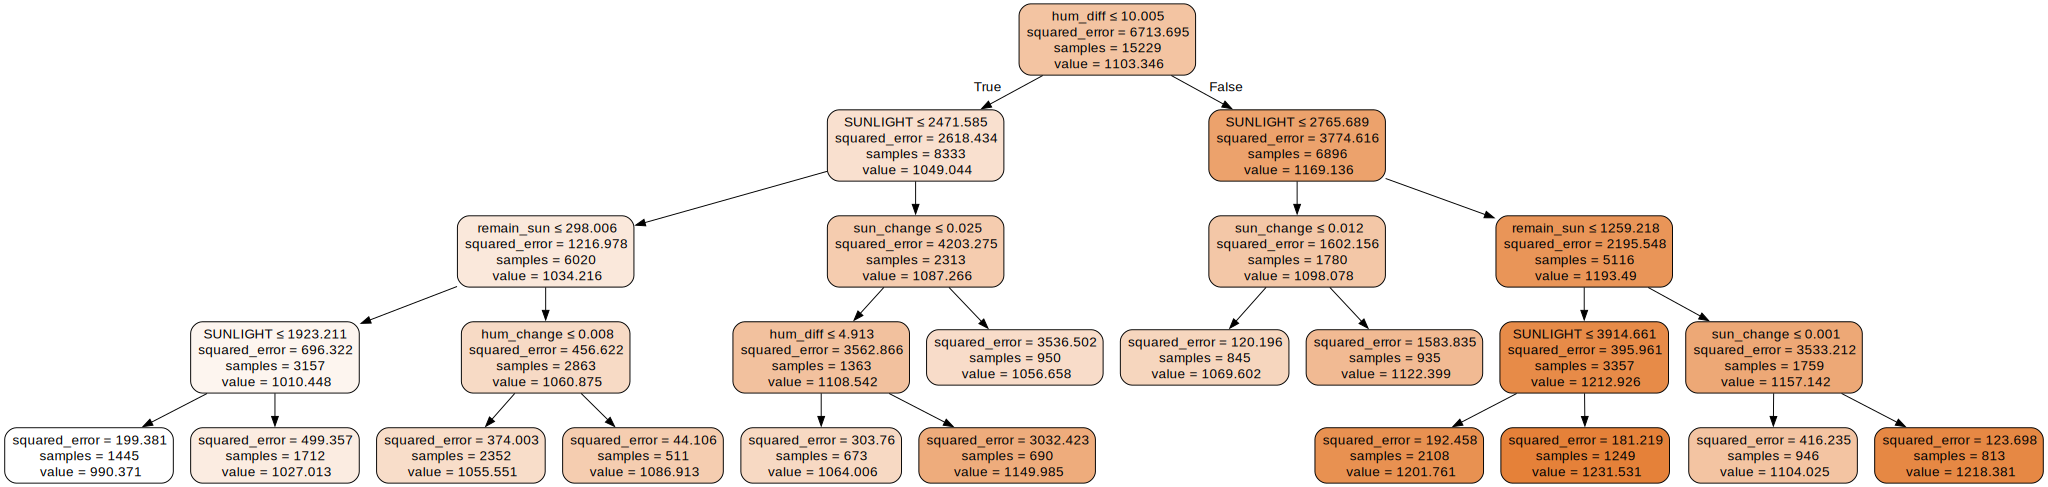

In [213]:
# Assuming 'forest_reg' is your trained Random Forest Regressor
# Visualize the first tree from the random forest
estimator = forest_reg.estimators_[0]

dot_data_rf = export_graphviz(estimator, out_file=None,
                              feature_names=X_train.columns,
                              class_names=['ORCHIDS'],
                              filled=True, rounded=True,
                              special_characters=True)
graph_rf = graphviz.Source(dot_data_rf)
graph_rf.render("random_forest_tree_lag")  # This saves the tree visualization to a file
graph_rf

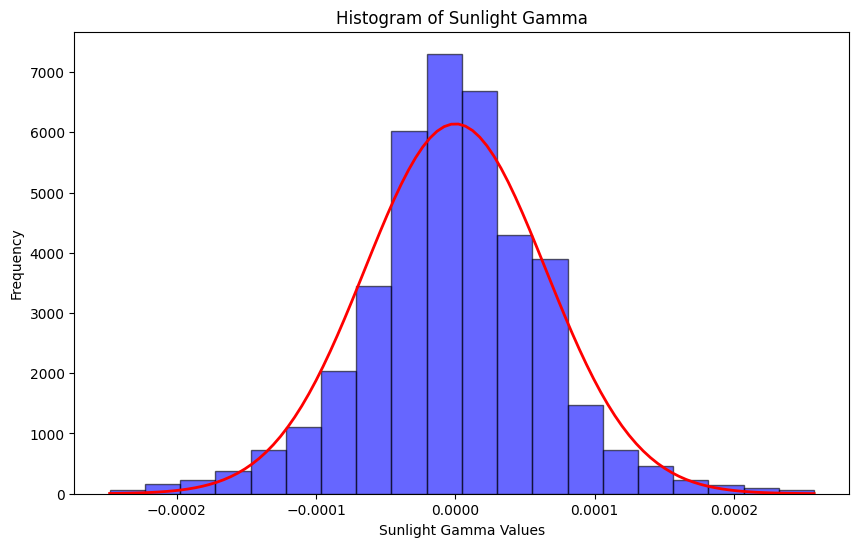

In [100]:
# Plotting the histogram of 'sunlight_gamma'
plt.figure(figsize=(10, 6))  # Optional: Set the size of the figure
counts, bins, patches = plt.hist(orchids['sun_gamma'], bins=20, density=True, color='blue', alpha=0.6, edgecolor='black')
plt.title('Histogram of Sunlight Gamma')
plt.xlabel('Sunlight Gamma Values')
plt.ylabel('Frequency')

# Generate points on the x axis between the minimum and maximum values of histogram bins
x = np.linspace(min(bins), max(bins), 100)

# Calculate the normal distribution with mean = 0 and the computed standard deviation
y = norm.pdf(x, 0, std_dev)

# Overlay the normal distribution curve
plt.plot(x, y, 'r-', lw=2)  # 'r-' for a red line with linewidth of 2

# Show the plot
plt.show()

In [200]:
# Order defines how many points on each side to use for the comparison to consider comparator(n, n+x)
order = 5000

# Find indices of local maxima and minima
maxima_sun = argrelextrema(orchids['SUNLIGHT'].values, np.greater, order=order)[0]
minima_sun = argrelextrema(orchids['SUNLIGHT'].values, np.less, order=order)[0]
maxima_orchid = argrelextrema(orchids['ORCHIDS'].values, np.greater, order=order)[0]
minima_orchid = argrelextrema(orchids['ORCHIDS'].values, np.less, order=order)[0]

# Extract timestamps for these extrema
times_maxima_sun = orchids.loc[maxima_sun, 'new_timestamp']
times_minima_sun = orchids.loc[minima_sun, 'new_timestamp']
times_maxima_orchid = orchids.loc[maxima_orchid, 'new_timestamp']
times_minima_orchid = orchids.loc[minima_orchid, 'new_timestamp']

print(len(times_maxima_sun))
print(len(times_maxima_orchid))
print(len(times_minima_sun))
print(len(times_minima_orchid))

3
2
2
2


In [206]:
times_maxima_sun/1000000

2069     0.2069
9087     0.9087
28434    2.8434
Name: new_timestamp, dtype: float64

In [207]:
times_maxima_orchid/1000000

21687    2.1687
29573    2.9573
Name: new_timestamp, dtype: float64

In [201]:
times_minima_sun

100        10000
18429    1842900
Name: new_timestamp, dtype: int64

In [202]:
times_minima_orchid

17258    1725800
27510    2751000
Name: new_timestamp, dtype: int64

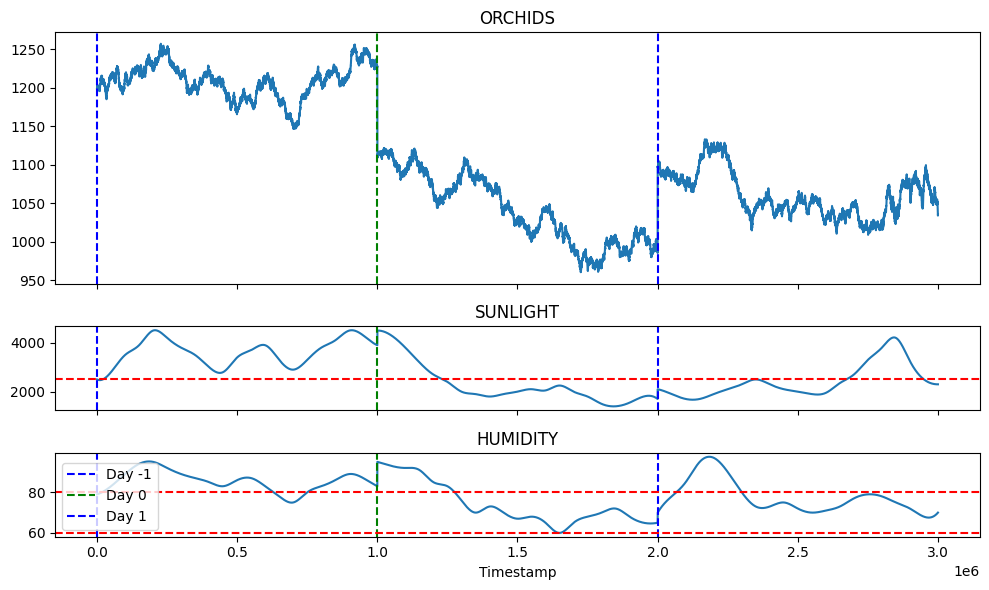

In [204]:
def plot_orchids_sunlight_humidity(df):
    fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 6), gridspec_kw={'height_ratios': [3, 1, 1]})
    
    # Plot ORCHIDS vs new_timestamp
    axs[0].plot(df['new_timestamp'], df['ORCHIDS'])
    axs[0].set_title('ORCHIDS')
    
    # Plot SUNLIGHT vs new_timestamp
    axs[1].plot(df['new_timestamp'], df['SUNLIGHT'])
    axs[1].set_title('SUNLIGHT')
    
    # Plot HUMIDITY vs new_timestamp
    axs[2].plot(df['new_timestamp'], df['HUMIDITY'])
    axs[2].set_title('HUMIDITY')
    
    # Add vertical lines at timestamps to signify day for all plots
    for ax in axs:
        ax.axvline(0, color='blue', linestyle='--', label='Day -1')
        ax.axvline(1000100, color='green', linestyle='--', label='Day 0')
        ax.axvline(2000200, color='blue', linestyle='--', label='Day 1')
    
    # Create dashed line between 60 to 80 for HUMIDITY plot
    axs[2].axhline(60, color='red', linestyle='--')
    axs[2].axhline(80, color='red', linestyle='--')

    axs[1].axhline(2500, color='red', linestyle='--')

    axs[-1].set_xlabel('Timestamp')
    
    plt.tight_layout()
    plt.legend()
    plt.show()

plot_orchids_sunlight_humidity(orchids)